In [1]:
import csv
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
%matplotlib inline
import cv2
import scipy
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
BASE_PATH='/volumes/data/wht_bld_cell_clasfy/'
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)
y = []
for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1:  # Ignoring those images which contains more than one categories.
        y.append(label)

y = np.asarray(y)

In [3]:
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
counts = np.bincount(encoded_y)
print(str(counts)+'\n')
print('Total images: '+ str(counts.sum(axis=0))+ '\n')
percentages = 100 * counts/sum(counts)
print('Respective percentage'+str(percentages)+'\n')
print(encoder.inverse_transform(list(range(5))))

[  3  88  33  21 207]

Total images: 352

Respective percentage[  0.85227273  25.           9.375        5.96590909  58.80681818]

['BASOPHIL' 'EOSINOPHIL' 'LYMPHOCYTE' 'MONOCYTE' 'NEUTROPHIL']


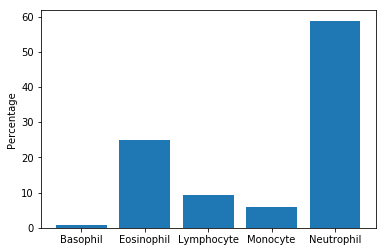

In [4]:
fig, ax = plt.subplots(1)
plt.bar(list(range(5)), percentages)
ax.set_xticklabels(('','Basophil', 'Eosinophil', 'Lymphocyte', 'Monocyte', 'Neutrophil'))
ax.set_ylabel('Percentage')
plt.show()

### Data Augmentation

In [5]:
def get_filename_for_index(index):
    PREFIX = 'Original_Images/BloodImage_'
    num_zeros = 5 - len(index)
    path = '0' * num_zeros + index
    return PREFIX + path + '.jpg'


# We will ignore Basophil as we have too little data to generalise on it.
reader = csv.reader(open(BASE_PATH + 'labels.csv'))
# skip the header
next(reader)

X = []
y = []

for row in reader:
    label = row[2]
    if len(label) > 0 and label.find(',') == -1 and label is not 'BASOPHIL':
        filename = get_filename_for_index(row[1])
        img_file = cv2.imread(BASE_PATH + filename)
        if img_file is not None:
            img_file = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)
            img_file = scipy.misc.imresize(arr=img_file, size=(240, 320, 3))
            img_arr = np.asarray(img_file)
            X.append(img_arr)
            y.append(label)
        else:
            print("No file found", BASE_PATH + filename)


X = np.asarray(X)
y = np.asarray(y)

No file found /volumes/data/wht_bld_cell_clasfy/Original_Images/BloodImage_00116.jpg


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)


eosinophil_samples = X_train[np.where(y_train == 'EOSINOPHIL')]
lymphocyte_samples = X_train[np.where(y_train == 'LYMPHOCYTE')]
monocyte_samples = X_train[np.where(y_train == 'MONOCYTE')]
neutrophil_samples = X_train[np.where(y_train == 'NEUTROPHIL')]


eosinophil_test_samples = X_test[np.where(y_test == 'EOSINOPHIL')]
lymphocyte_test_samples = X_test[np.where(y_test == 'LYMPHOCYTE')]
monocyte_test_samples = X_test[np.where(y_test == 'MONOCYTE')]
neutrophil_test_samples = X_test[np.where(y_test == 'NEUTROPHIL')]

(<matplotlib.axes._subplots.AxesSubplot at 0x7f7b09e4b160>,
 Text(0.5,1,'NEUTROPHIL'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

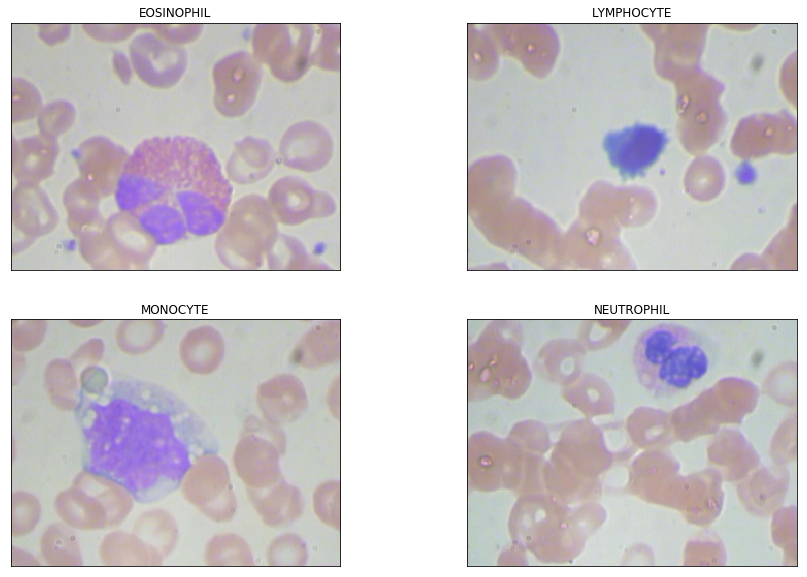

In [7]:
plt.rcParams["figure.figsize"] = [15,10]
plt.subplot(2,2,1), plt.imshow((eosinophil_samples[5])), plt.title('EOSINOPHIL'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2), plt.imshow((lymphocyte_samples[5])), plt.title('LYMPHOCYTE'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3), plt.imshow((monocyte_samples[5])), plt.title('MONOCYTE'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4), plt.imshow((neutrophil_samples[5])), plt.title('NEUTROPHIL'), plt.xticks([]), plt.yticks([])

In [8]:
datagen = ImageDataGenerator(
    rotation_range=20,
    fill_mode='constant',
    height_shift_range=0.1,
    width_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    shear_range=0.2
)

datagen_simple = ImageDataGenerator()

In [9]:
eosinophil_generator = datagen.flow(
        eosinophil_samples,
        y_train[np.where(y_train == 'EOSINOPHIL')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TRAIN/EOSINOPHIL',
        batch_size=1)

lymphocyte_generator = datagen.flow(
        lymphocyte_samples,
        y_train[np.where(y_train == 'LYMPHOCYTE')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TRAIN/LYMPHOCYTE',
        batch_size=1)

monocyte_generator = datagen.flow(
        monocyte_samples,
        y_train[np.where(y_train == 'MONOCYTE')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TRAIN/MONOCYTE',
        batch_size=1)

neutrophil_generator = datagen.flow(
        neutrophil_samples,
        y_train[np.where(y_train == 'NEUTROPHIL')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TRAIN/NEUTROPHIL',
        batch_size=1)

###########################################################################################################################

eosinophil_test_generator = datagen_simple.flow(
        eosinophil_test_samples,
        y_test[np.where(y_test == 'EOSINOPHIL')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TEST_SIMPLE/EOSINOPHIL',
        batch_size=1)

lymphocyte_test_generator = datagen_simple.flow(
        lymphocyte_test_samples,
        y_test[np.where(y_test == 'LYMPHOCYTE')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TEST_SIMPLE/LYMPHOCYTE',
        batch_size=1)

monocyte_test_generator = datagen_simple.flow(
        monocyte_test_samples,
        y_test[np.where(y_test == 'MONOCYTE')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TEST_SIMPLE/MONOCYTE',
        batch_size=1)

neutrophil_test_generator = datagen_simple.flow(
        neutrophil_test_samples,
        y_test[np.where(y_test == 'NEUTROPHIL')],
        save_to_dir='/volumes/data/wht_bld_cell_clasfy/images/TEST_SIMPLE/NEUTROPHIL',
        batch_size=1)

In [10]:
for i in range(2500):
    next(eosinophil_generator)
    next(lymphocyte_generator)
    next(monocyte_generator)
    next(neutrophil_generator)
    
for i in range(len(eosinophil_test_samples)):
    next(eosinophil_test_generator)
for i in range(len(lymphocyte_test_samples)):
    next(lymphocyte_test_generator)
for i in range(len(monocyte_test_samples)):
    next(monocyte_test_generator)
for i in range(len(neutrophil_test_samples)):
    next(neutrophil_test_generator)

In [11]:
print('Done!')

Done!
